In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import os
import matplotlib.image as mpimg


In [11]:
sign_datatest = mpimg.imread('asl_alphabet_test/asl_alphabet_test/C_test.jpg')
sign_datatrain = mpimg.imread('asl_alphabet_train/asl_alphabet_train/C/C10.jpg')

In [13]:
sign_datatrain.shape

(200, 200, 3)

In [14]:
sign_datatest.shape

(200, 200, 3)

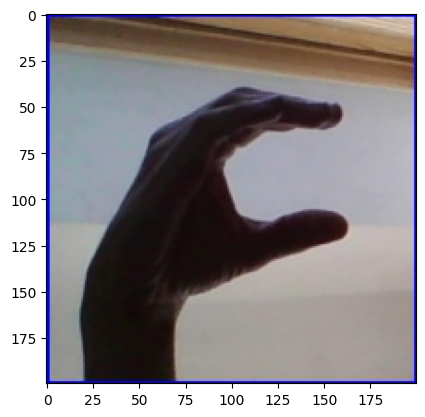

In [64]:
plt.imshow(sign_datatest)

In [6]:
sign_data.shape

(200, 200, 3)

In [29]:
X_train = []
y_train = []

needed_classes = ["A","B","C","nothing"]
label = {
 "A": 0,
 "B": 1,
 "C": 2,
 "nothing": 3


}

for i in os.listdir('asl_alphabet_train/asl_alphabet_train/'):
    if i not in needed_classes:  
        continue
    for j in os.listdir(f'asl_alphabet_train/asl_alphabet_train/{i}/'):
        try:
            image = cv2.imread(f'asl_alphabet_train/asl_alphabet_train/{i}/{j}')  
            if image is None:
                continue
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
            image = cv2.resize(image, (200, 200))
            image = image / 255.0

            X_train.append(image)
            y_train.append(label[i])
        except Exception as e:
            print("Ошибка:", e, f"в файле {i}/{j}")
            continue

X_train = np.array(X_train)
y_train = np.array(y_train)



In [30]:
X_train

array([[[[0.00392157, 0.00784314, 0.98823529],
         [0.00392157, 0.        , 0.97254902],
         [0.03921569, 0.        , 0.97647059],
         ...,
         [0.01568627, 0.        , 0.97254902],
         [0.01176471, 0.01568627, 0.98823529],
         [0.        , 0.        , 0.96470588]],

        [[0.00392157, 0.00392157, 0.97647059],
         [0.01176471, 0.00392157, 0.91764706],
         [0.05882353, 0.02352941, 0.81960784],
         ...,
         [0.06666667, 0.02352941, 0.77647059],
         [0.01568627, 0.00784314, 0.82352941],
         [0.02352941, 0.04313725, 0.89019608]],

        [[0.        , 0.        , 0.94509804],
         [0.03921569, 0.03137255, 0.80784314],
         [0.15294118, 0.1254902 , 0.56470588],
         ...,
         [0.74117647, 0.67843137, 0.95686275],
         [0.68235294, 0.64705882, 1.        ],
         [0.04313725, 0.02745098, 0.64313725]],

        ...,

        [[0.01960784, 0.01176471, 0.99607843],
         [0.01176471, 0.01176471, 0.76470588]

In [43]:
y_train

array([0, 0, 0, ..., 3, 3, 3], shape=(12000,))

In [40]:
X_test = []
y_test = []

needed_classes = ["A_test.jpg","B_test.jpg","C_test.jpg","nothing_test.jpg"]
label = {
 "A_test.jpg": 0,
 "B_test.jpg": 1,
 "C_test.jpg": 2,
 "nothing_test.jpg": 3
}

test_path = 'asl_alphabet_test/asl_alphabet_test/'

for j in os.listdir(test_path):
    if j not in needed_classes:  # проверяем, что файл есть в нужных
        continue
    try:
        image = cv2.imread(os.path.join(test_path, j))
        if image is None:
            continue
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (200, 200))
        image = image / 255.0
        image = image.astype(np.float32)

        X_test.append(image)
        y_test.append(label[j])
    except Exception as e:
        print("Ошибка:", e, f"в файле {j}")
        continue

X_test = np.array(X_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.int32)

In [41]:
X_test

array([[[[0.00392157, 0.00392157, 1.        ],
         [0.        , 0.        , 0.98039216],
         [0.00784314, 0.        , 0.96862745],
         ...,
         [0.01960784, 0.        , 0.94509804],
         [0.00392157, 0.00392157, 0.9607843 ],
         [0.        , 0.01960784, 0.9764706 ]],

        [[0.00784314, 0.00392157, 0.9882353 ],
         [0.01960784, 0.01176471, 0.92941177],
         [0.04313726, 0.02745098, 0.8156863 ],
         ...,
         [0.0627451 , 0.02745098, 0.76862746],
         [0.00784314, 0.01176471, 0.81960785],
         [0.        , 0.01960784, 0.85882354]],

        [[0.00392157, 0.        , 0.94509804],
         [0.04705882, 0.03137255, 0.8117647 ],
         [0.32156864, 0.29803923, 0.7294118 ],
         ...,
         [0.47058824, 0.4392157 , 0.7411765 ],
         [0.4509804 , 0.4392157 , 0.9529412 ],
         [0.04705882, 0.04705882, 0.6666667 ]],

        ...,

        [[0.01568628, 0.        , 0.9411765 ],
         [0.03921569, 0.01960784, 0.75686276]

In [42]:
y_test

array([0, 1, 2, 3], dtype=int32)

In [44]:
from keras.utils import to_categorical

In [45]:
y_train = to_categorical(y_train)

In [46]:
y_test = to_categorical(y_test)

In [47]:
y_train

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], shape=(12000, 4))

In [48]:
X_train.shape

(12000, 200, 200, 3)

In [49]:
y_train.shape

(12000, 4)

In [50]:
X_test.shape

(4, 200, 200, 3)

In [51]:
y_test.shape

(4, 4)

In [53]:
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from keras.optimizers import Adam
from keras.layers import Dropout

In [54]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation='relu', input_shape=(200,200,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=4, activation='softmax'))

C:\Users\user\Desktop\ML (1)\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
model.compile(optimizer=Adam(learning_rate=0.00056), loss='categorical_crossentropy', metrics=['accuracy'])

In [61]:
model.fit(
    X_train, y_train,validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,
)


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 191s 507ms/step - accuracy: 0.9682 - loss: 0.0768 - val_accuracy: 1.0000 - val_loss: 1.5795e-06
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 201s 537ms/step - accuracy: 0.9771 - loss: 0.0506 - val_accuracy: 1.0000 - val_loss: 2.0862e-07
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 191s 509ms/step - accuracy: 0.9812 - loss: 0.0472 - val_accuracy: 1.0000 - val_loss: 5.9605e-08
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 169s 451ms/step - accuracy: 0.9839 - loss: 0.0389 - val_accuracy: 1.0000 - val_loss: 2.5332e-06
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 170s 453ms/step - accuracy: 0.9907 - loss: 0.0209 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 572s 2s/step - accuracy: 0.9896 - loss: 0.0261 - val_accuracy: 1.0000 - val_loss: 5.9605e-08
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 238s 635ms/step - accuracy: 0.9911 - loss: 0.0215 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 236s 631ms/

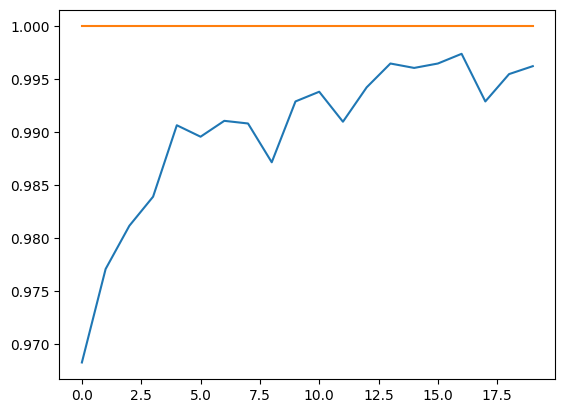

In [63]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])

In [67]:
img = cv2.imread('asl_alphabet_test/asl_alphabet_test/C_test.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   
img = cv2.resize(img, (200, 200))           
img = img / 255                           
img = np.expand_dims(img, axis=0)            
pred = model.predict(img)
print(pred)
print("sign", np.argmax(pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[[0. 0. 1. 0.]]
sign 2


In [68]:
import pickle

In [69]:
with open ('model.sign','wb') as file:
    pickle.dump(model, file)

In [70]:
print(os.getcwd())

C:\Users\user\Desktop\ML (1)\Neyron


In [74]:
for f in os.listdir():
    print(f)

.ipynb_checkpoints
animals
asl_alphabet_test
asl_alphabet_train
class.ipynb
CNN.ipynb
corn-snake-from-the-lower-florida-keys-530475947-588124bc5f9b58bdb3ec9f93.jpg
DATA
dataset
detection
Emotion_Detection
kaggle_evaluation
Neyronn.ipynb
number_of_samples.csv
object detection.ipynb
Odz
Odz.ipynb
OOP.ipynb
PandasBears
README.dataset.txt
README.roboflow.txt
recordings.zip
RNN
RNN.ipynb
RNN1
RNN2
sample_submission.csv
Sign language
Sign-detection
Snakes_Dataset
speech
test
test.csv
train
train.csv
Untitled (12).ipynb
Untitled (16).ipynb
Untitled (20).ipynb
Untitled Folder
Untitled Folder 1
Untitled.ipynb
Untitled1.ipynb
Untitled2.ipynb
Untitled3.ipynb
Untitled4.ipynb
Untitled5.ipynb
Untitled6.ipynb
valid
Xndir.ipynb
